In [83]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt

In [112]:
dir = '/glade/u/home/djk2120/UMBS_default/output/'
fil = '*.h1.*'
paths = sorted(glob.glob(dir+fil))

In [111]:
ds = xr.open_mfdataset(paths,combine='by_coords')
ds

<xarray.Dataset>
Dimensions:       (hist_interval: 2, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, nvegwcs: 4, time: 262992)
Coordinates:
  * levdcmp       (levdcmp) float32 1.0
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * time          (time) datetime64[ns] 1999-01-01T01:00:00.000107288 ... 2018-01-01
Dimensions without coordinates: hist_interval, levsoi, lndgrid, nvegwcs
Data variables:
    BTRAN         (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    COSZEN        (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    ELAI          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    ESAI          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    FCEV          (time, lndgrid) float32 dask.array<shape=(262992, 1), chunksize=(8760, 1)>
    FCTR     

(48,)

(1999, 2018)

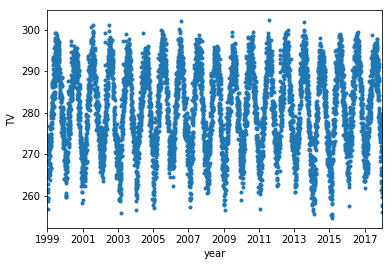

In [119]:
g = ds['time.year']+ds['time.dayofyear']/366
g.name = 'year'
ds['TV'].groupby(g).mean(dim=xr.ALL_DIMS).plot.line('.')
ax = plt.xticks(1999+2*np.arange(10))
plt.xlim([1999,2018])

Text(0.5,1,'Monthly means')

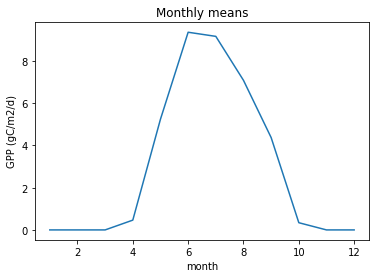

In [120]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

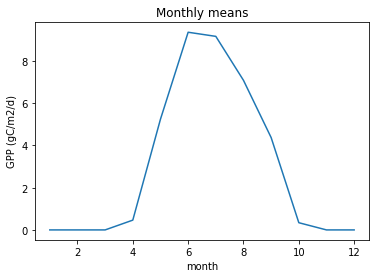

In [121]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

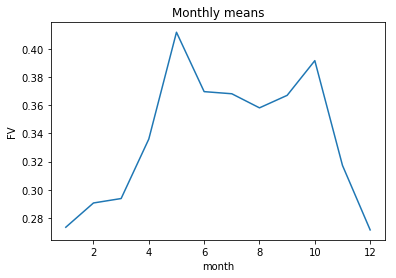

In [122]:
xf = 24*60*60*12/1e6
(xf*ds['FV']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

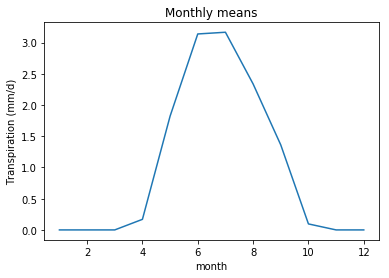

In [123]:
xf = 24*60*60/2.5e6
(xf*ds['FCTR']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('Transpiration (mm/d)')
plt.title('Monthly means')

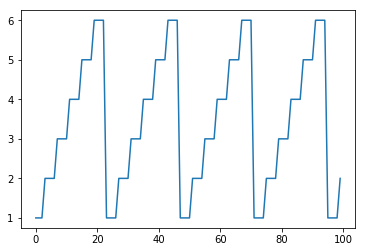

In [144]:
mc = np.unique(ds['mcsec'][ds['time.year']==2015])
g = ds['mcsec'].load()

i = 0
j = 1
for t in mc:
    g[ds['mcsec']==t]=j
    if (i%2)==1:
        j = j+1
    i +=1
    
plt.plot(g[0:100])

Text(0.5,1,'July diurnal mean')

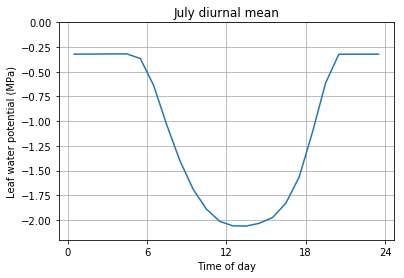

In [59]:
xf = 1/101972
ix = ds.swap_dims({'time':'mcsec'})['time.month']==7
lwp = xf*(ds.swap_dims({'time':'mcsec'})['VEGWP'][ix,0]
               .groupby('mcsec').mean(dim=xr.ALL_DIMS).values)
lwp_diurnal = np.zeros(24)
lwp_diurnal[:17] = lwp[7:]
lwp_diurnal[17:] = lwp[:7]

plt.plot(0.5+np.arange(24),lwp_diurnal)
plt.xticks(6*np.arange(5))
plt.ylim([-2.2,0])
plt.grid()
plt.ylabel('Leaf water potential (MPa)')
plt.xlabel('Time of day')
plt.title('July diurnal mean')

Text(0.5,1,'July diurnal mean')

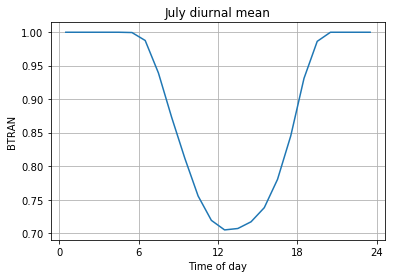

In [62]:
ix = ds.swap_dims({'time':'mcsec'})['time.month']==7
lwp = (ds.swap_dims({'time':'mcsec'})['BTRAN'][ix]
               .groupby('mcsec').mean(dim=xr.ALL_DIMS).values)
lwp_diurnal = np.zeros(24)
lwp_diurnal[:17] = lwp[7:]
lwp_diurnal[17:] = lwp[:7]

plt.plot(0.5+np.arange(24),lwp_diurnal)
plt.xticks(6*np.arange(5))

plt.grid()
plt.ylabel('BTRAN')
plt.xlabel('Time of day')
plt.title('July diurnal mean')

Text(0.5,1,'multi-year mean at daily resolution')

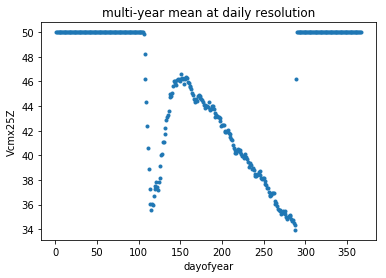

In [66]:
ds['Vcmx25Z'].groupby('time.dayofyear').mean(dim=xr.ALL_DIMS).plot.line('.')
plt.title('multi-year mean at daily resolution')